<a href="https://colab.research.google.com/github/deepikadhiman5517/Predicting-the-Price-of-a-Football-Player/blob/main/football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the English Premier League, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. An important part of negotiations is predicting the fair market price for a player. You are tasked with predicting this Market Value of a player using the data provided below

The attached data set consists of the following attributes:

name: Name of the player
club: Club of the player
age : Age of the player
position : The usual position on the pitch
position_cat :
1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017
page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
fpl_value : Value in Fantasy Premier League as on July 20th, 2017
fpl_sel : % of FPL players who have selected that player in their team
fpl_points : FPL points accumulated over the previous season
region:
1 for England

2 for EU

3 for Americas

4 for Rest of World

nationality
new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
age_cat
club_id
big_club: Whether one of the Top 6 clubs
new_signing: Whether a new signing for 2017/18 (till 20th July)
You have learned about a number of regression algorithms in your course: Linear Regression, Lasso Regression, Ridge Regression, Nearest Neighbour Regression, Support Vector Regression, Tree Regression, Random Forest Regression and Gradient Boosted Regression.

# **Task 1: Use Seaborn to investigate the data and present your findings (20 marks)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

let read the dataset

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/football.csv')
train.head()


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


These are the columns present in the given dataseat

In [ ]:
train.shape

(461, 17)

In [ ]:
train.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

Calculating some statistical pointers like percentile, mean and standard deviation of the dataset

In [ ]:
train.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


Using describe function, examine the basic statistical details:

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [ ]:
train['market_value'].max()

75.0

In [ ]:
train['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

***1. No of Players in every club ***

In [ ]:
print("club            player in each club\n")
train['club'].value_counts()

club            player in each club



Arsenal              28
Everton              28
Huddersfield         28
Liverpool            27
Manchester+United    25
Swansea              25
Watford              24
Leicester+City       24
Bournemouth          24
Southampton          23
Stoke+City           22
West+Ham             22
Brighton+and+Hove    22
Newcastle+United     21
Crystal+Palace       21
Chelsea              20
Tottenham            20
Manchester+City      20
West+Brom            19
Burnley              18
Name: club, dtype: int64

In [ ]:
train['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [ ]:
print("pos  no of player\n")
train['position'].value_counts()

pos  no of player



CB    85
CM    63
CF    61
GK    42
LW    36
DM    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: position, dtype: int64

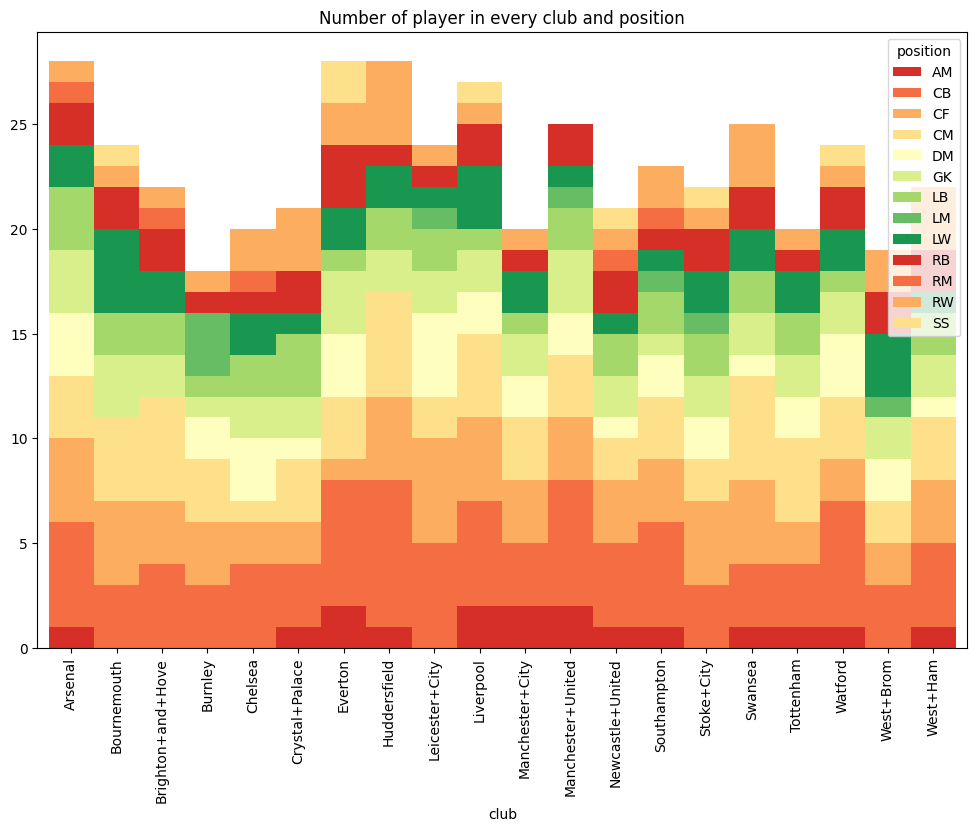

In [ ]:
pd.crosstab(train.club,train.position).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('Number of player in every club and position')
plt.show()

**Observation**:

Bar graph above shows how many players are there in every clubs and the variation of players position. - x axis represents the clubs name - y-axis represent the total number of players.

The variation of player position are distinguish by different color in each bars. the colors code for players position is explained on the righ side of the chart.

**Arsenal , Everton , and Huddersfield have the biggest number of players with 28 players . Burnley has the lowest number of players with 18 players.**

***2.Distribution of Player's age***

<ipython-input-17-e86e6b4d369a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age'], color = "Red")


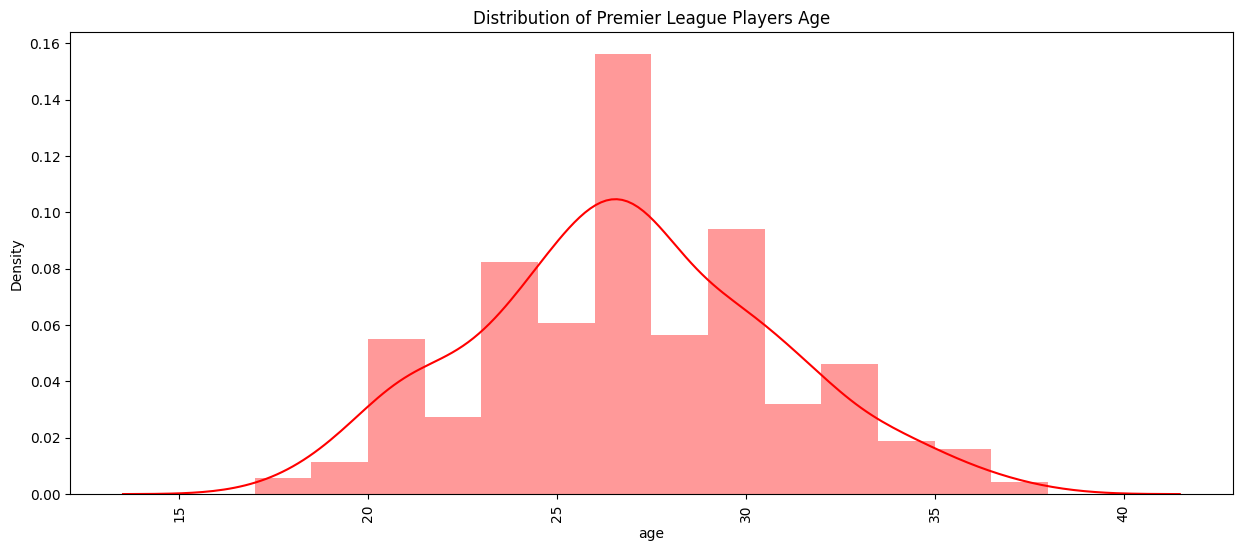

In [ ]:
plt.subplots(figsize=(15,6))
sns.set_color_codes()
sns.distplot(train['age'], color = "Red")
plt.xticks(rotation=90)
plt.title(r'Distribution of Premier League Player''s Age')
plt.show()

**Observation**:
<p> A typical histogram of players age can be called Edge Peak Histogram. The edge peak distribution looks like the normal distribution except that it has a large peak at one tail. As it is shown in the histogram, the distribution of age is increased untill it meet the peak point at the age between 25-30. There is one bar that significanly higher than the others, that is why the histogram above can be calles Edge peak histogram.</p>

In [ ]:
dup=train.duplicated()
print(dup.sum())

0


# **Missing Value**

In [ ]:
train.isnull().values.any()

True

Now, let's see the dataset if there are any null values or NaN:

In [ ]:
train.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

As you can see above, NaN value is there in region column. So, now filling it with true value.

do we nreed region for prediction?

In [ ]:
train['region']==0

0      False
1      False
2      False
3      False
4      False
       ...  
456    False
457    False
458    False
459    False
460    False
Name: region, Length: 461, dtype: bool

In [ ]:
print(train[train['region'].isnull()])

             name          club  age position  position_cat  market_value  \
188  Steve Mounie  Huddersfield   22       CF             1           5.5   

     page_views  fpl_value fpl_sel  fpl_points  region nationality  \
188          56        6.0   0.60%           0     NaN       Benin   

     new_foreign  age_cat  club_id  big_club  new_signing  
188            0        2        8         0            0  


In [ ]:
display(train.iloc[188])

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                6.0
fpl_sel                0.60%
fpl_points                 0
region                   NaN
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

*let replace Nan value with 4 because it falls under category *



In [ ]:
train['region']=train['region'].replace(np.nan,4)

In [ ]:
display(train.iloc[188])

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                6.0
fpl_sel                0.60%
fpl_points                 0
region                   4.0
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

In [ ]:
train.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

# *Exploratory data Analysis*

In [ ]:
train.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

# **age distribution**

<Axes: xlabel='age', ylabel='market_value'>

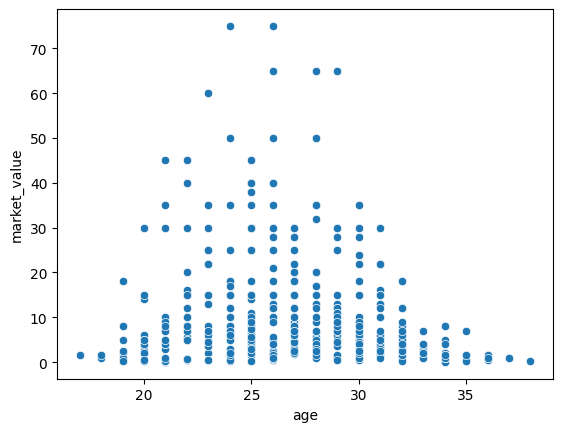

In [ ]:
sns.scatterplot(data=train,x='age',y='market_value')

In [ ]:
average_age=[]
for clb in train['club']:
  average_age.append(np.mean(train['age'].loc[train['club']==clb]))


<Axes: xlabel='age', ylabel='club'>

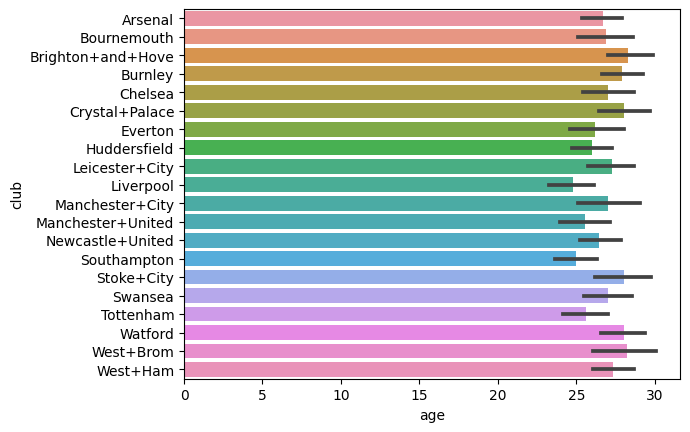

In [ ]:
sns.barplot(data=train,x='age',y='club')

# **Position Category disctribution**

<Axes: xlabel='position_cat', ylabel='market_value'>

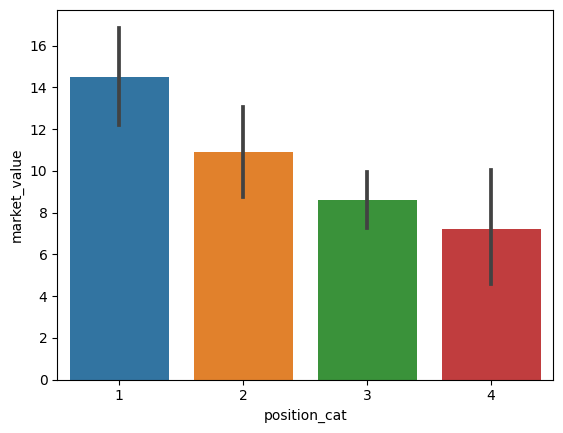

In [ ]:
sns.barplot(data=train,x='position_cat',y='market_value')

<Axes: xlabel='club', ylabel='market_value'>

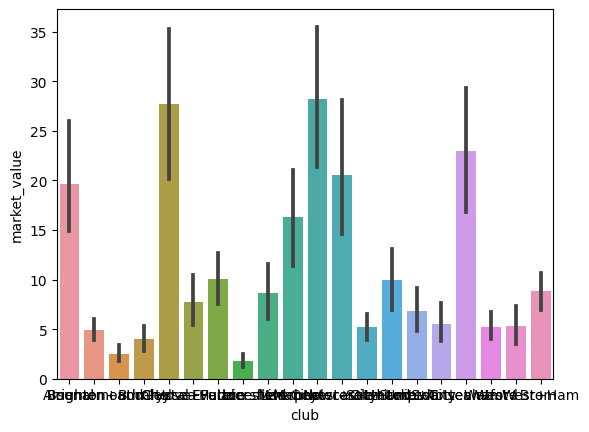

In [ ]:
sns.barplot(data=train,x='club',y='market_value')

# **page view distribution**

<Axes: xlabel='page_views', ylabel='market_value'>

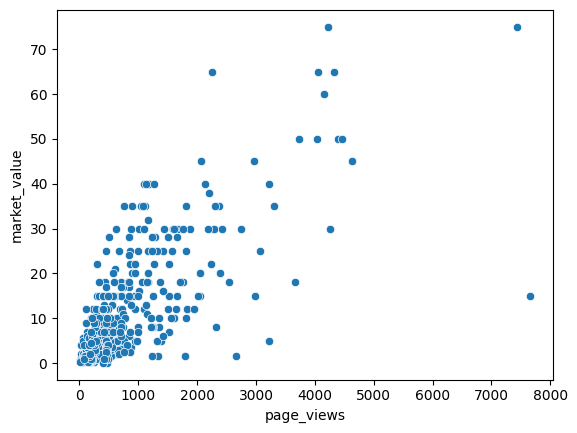

In [ ]:
sns.scatterplot(data=train,x='page_views',y='market_value')

<Axes: xlabel='page_views', ylabel='age'>

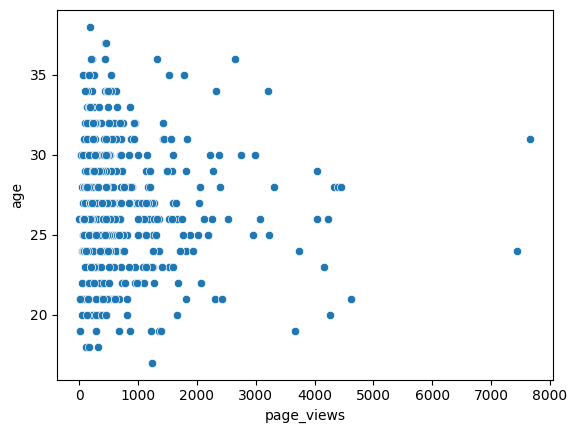

In [ ]:
sns.scatterplot(data=train,x='page_views',y='age')

<Axes: xlabel='page_views', ylabel='fpl_value'>

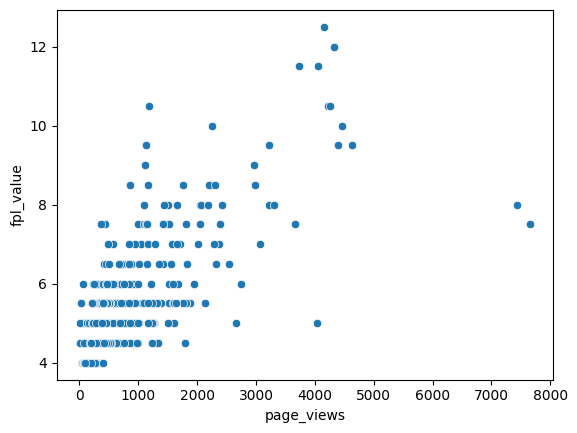

In [ ]:
sns.scatterplot(data=train,x='page_views',y='fpl_value')

<Axes: xlabel='page_views', ylabel='fpl_points'>

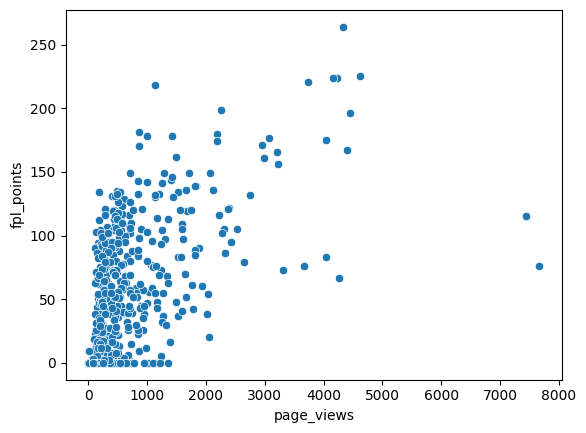

In [ ]:
sns.scatterplot(data=train,x='page_views',y='fpl_points')

**Top 10 Player viewed**

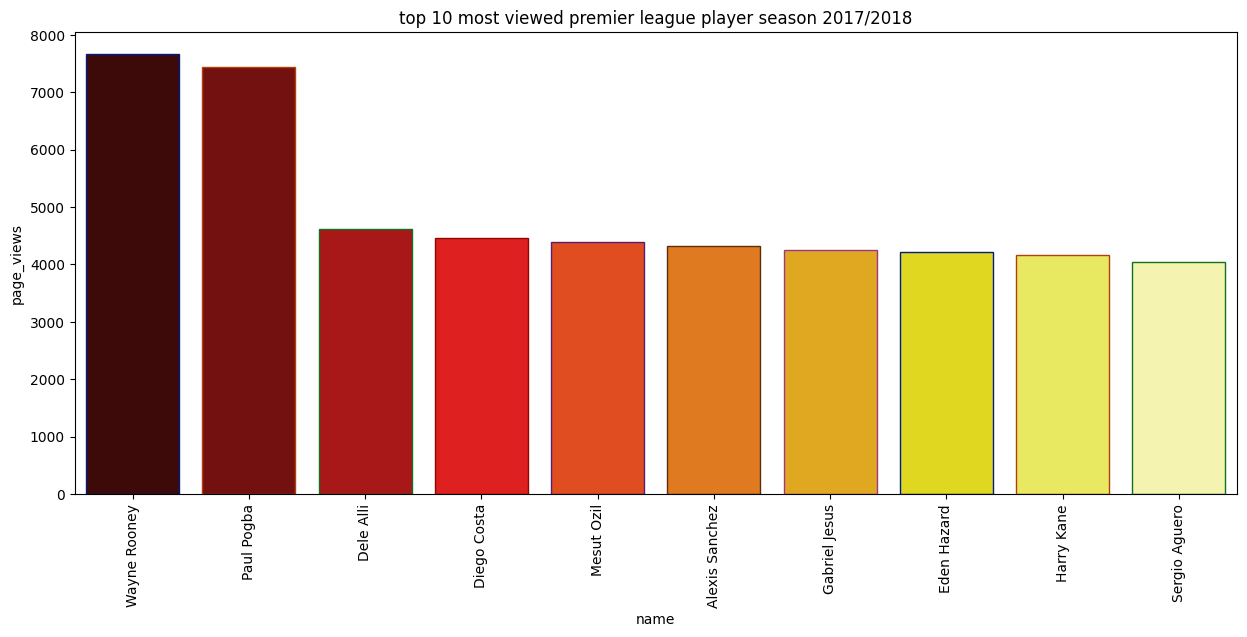

In [ ]:
#most view player
trainview=train.nlargest(10,'page_views').sort_values('page_views',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="page_views",  data=trainview ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 most viewed premier league player season 2017/2018')
plt.show()

Bar chart above shows the top 10 most view players. The x-axis represents players name while y-axis represent market value.

It appears that Wayne Rooney has the biggest market value, followed by Paul Pogba and Dele Alli on 2nd and 3rd position.

In [ ]:
train.corr(method='pearson')

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.220678,-0.132396,-0.048682,-0.097659,0.187785,0.080379,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
position_cat,0.220678,1.000000,-0.217637,-0.279432,-0.491800,-0.084682,-0.067439,0.001415,0.196853,-0.016599,0.017915,-0.105127
market_value,-0.132396,-0.217637,1.000000,0.739657,0.788653,0.615155,0.099114,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,-0.279432,0.739657,1.000000,0.730640,0.542464,0.027441,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,-0.491800,0.788653,0.730640,1.000000,0.618837,0.083883,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_points,0.187785,-0.084682,0.615155,0.542464,0.618837,1.000000,-0.011569,-0.204837,0.176572,0.041094,0.280061,0.085720
region,0.080379,-0.067439,0.099114,0.027441,0.083883,-0.011569,1.000000,0.049800,0.085190,0.066483,0.035883,0.174007
new_foreign,-0.125400,0.001415,0.098056,-0.049725,0.108650,-0.204837,0.049800,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,0.196853,-0.117682,-0.041672,-0.082056,0.176572,0.085190,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.016599,-0.046068,-0.092409,-0.060884,0.041094,0.066483,-0.002786,-0.004668,1.000000,-0.155667,0.134085


<Axes: xlabel='fpl_points', ylabel='market_value'>

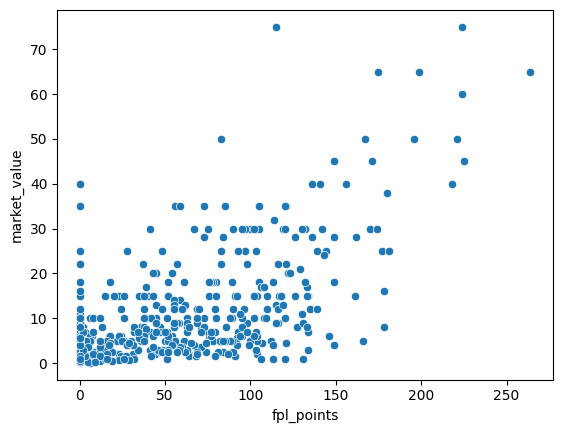

In [ ]:
sns.scatterplot(data=train,x='fpl_points',y='market_value')

In [ ]:
country,counts=np.unique(train['nationality'],return_counts=True)

**top 10 bigest market value of premier league player season 2017/2018**

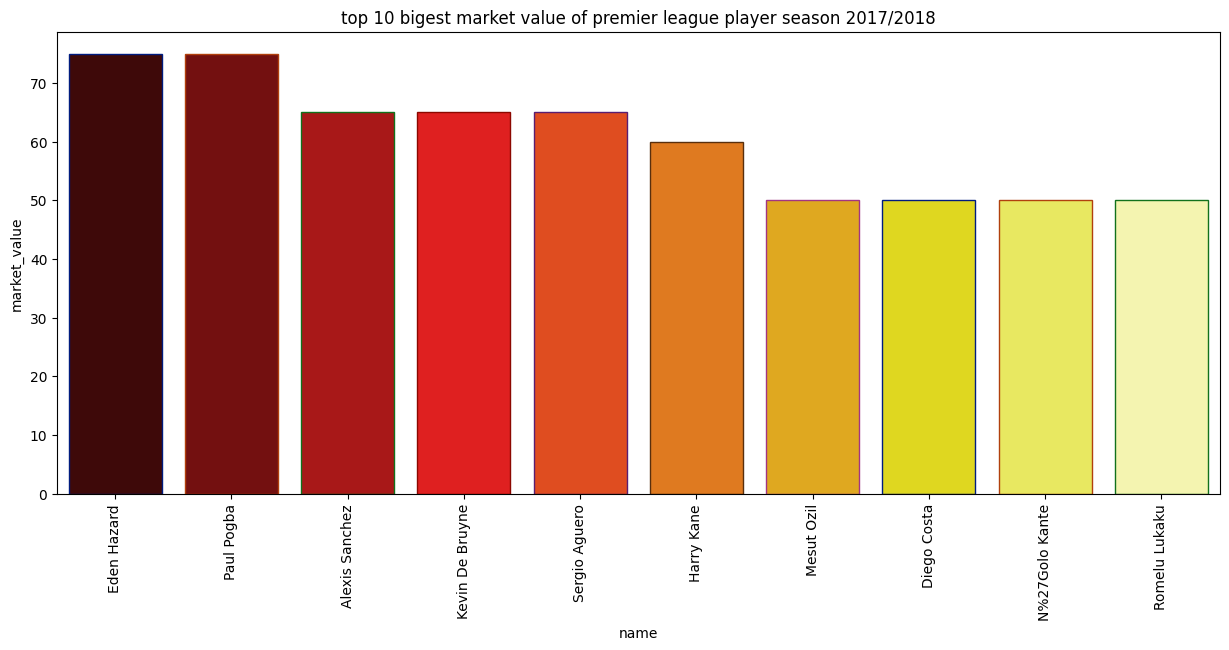

In [ ]:
#most market value
trainmarketv = train.nlargest(10, 'market_value').sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="name", y="market_value",  data=trainmarketv ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('top 10 bigest market value of premier league player season 2017/2018')
plt.show()

**club with their market value average**


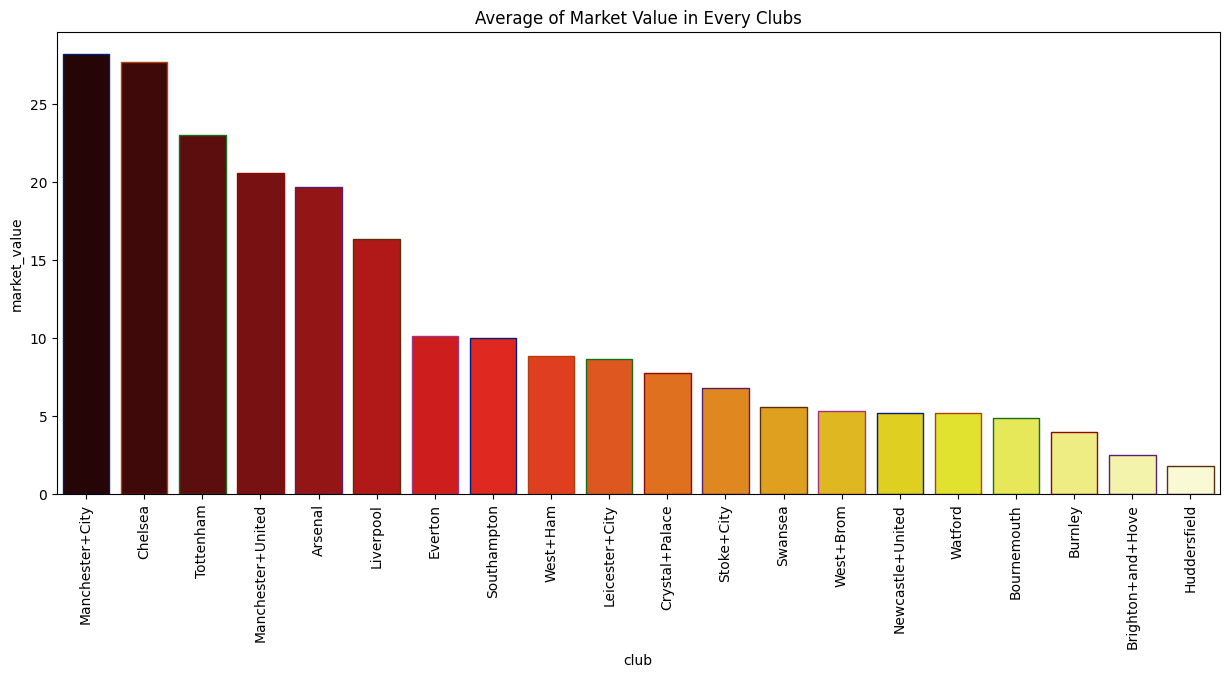

In [ ]:
#club with their market value average
train_meanmv=pd.DataFrame(train.groupby(['club'])['market_value'].mean()).reset_index().sort_values('market_value',ascending=False)
plt.subplots(figsize=(15,6))
sns.barplot(x="club", y="market_value",data=train_meanmv,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Average of Market Value in Every Clubs')
plt.show()

Bar chart above shows sorted average of market value for each club. The x-axis represents clubs name while y-axis represent its average market value.

It appears that ManCity and Chelsea, which are famous for spending money for a star player have the biggest average market value. They are followed by Totenham on the 3rd position. Burnley, Brighton, and Huddersfield are sitting in the lowest 3.

# **Position distribution**

In [ ]:
df1=train.iloc[:,[1,4,5]]
df1

,club,position_cat,market_value
0,Arsenal,1,65.0
1,Arsenal,1,50.0
2,Arsenal,4,7.0
3,Arsenal,1,20.0
4,Arsenal,3,22.0
...,...,...,...
456,West+Ham,2,5.0
457,West+Ham,3,7.0
458,West+Ham,3,4.5
459,West+Ham,1,1.0


In [ ]:
df1 = df1.groupby(['club','position_cat'])
df2 = df1.mean()
df2 = df2.reset_index()
df2

,club,position_cat,market_value
0,Arsenal,1,29.6250
1,Arsenal,2,21.0000
2,Arsenal,3,15.1000
3,Arsenal,4,5.0000
4,Bournemouth,1,6.3500
...,...,...,...
75,West+Brom,4,2.7500
76,West+Ham,1,11.5000
77,West+Ham,2,8.2500
78,West+Ham,3,7.3125


<Axes: xlabel='club', ylabel='market_value'>

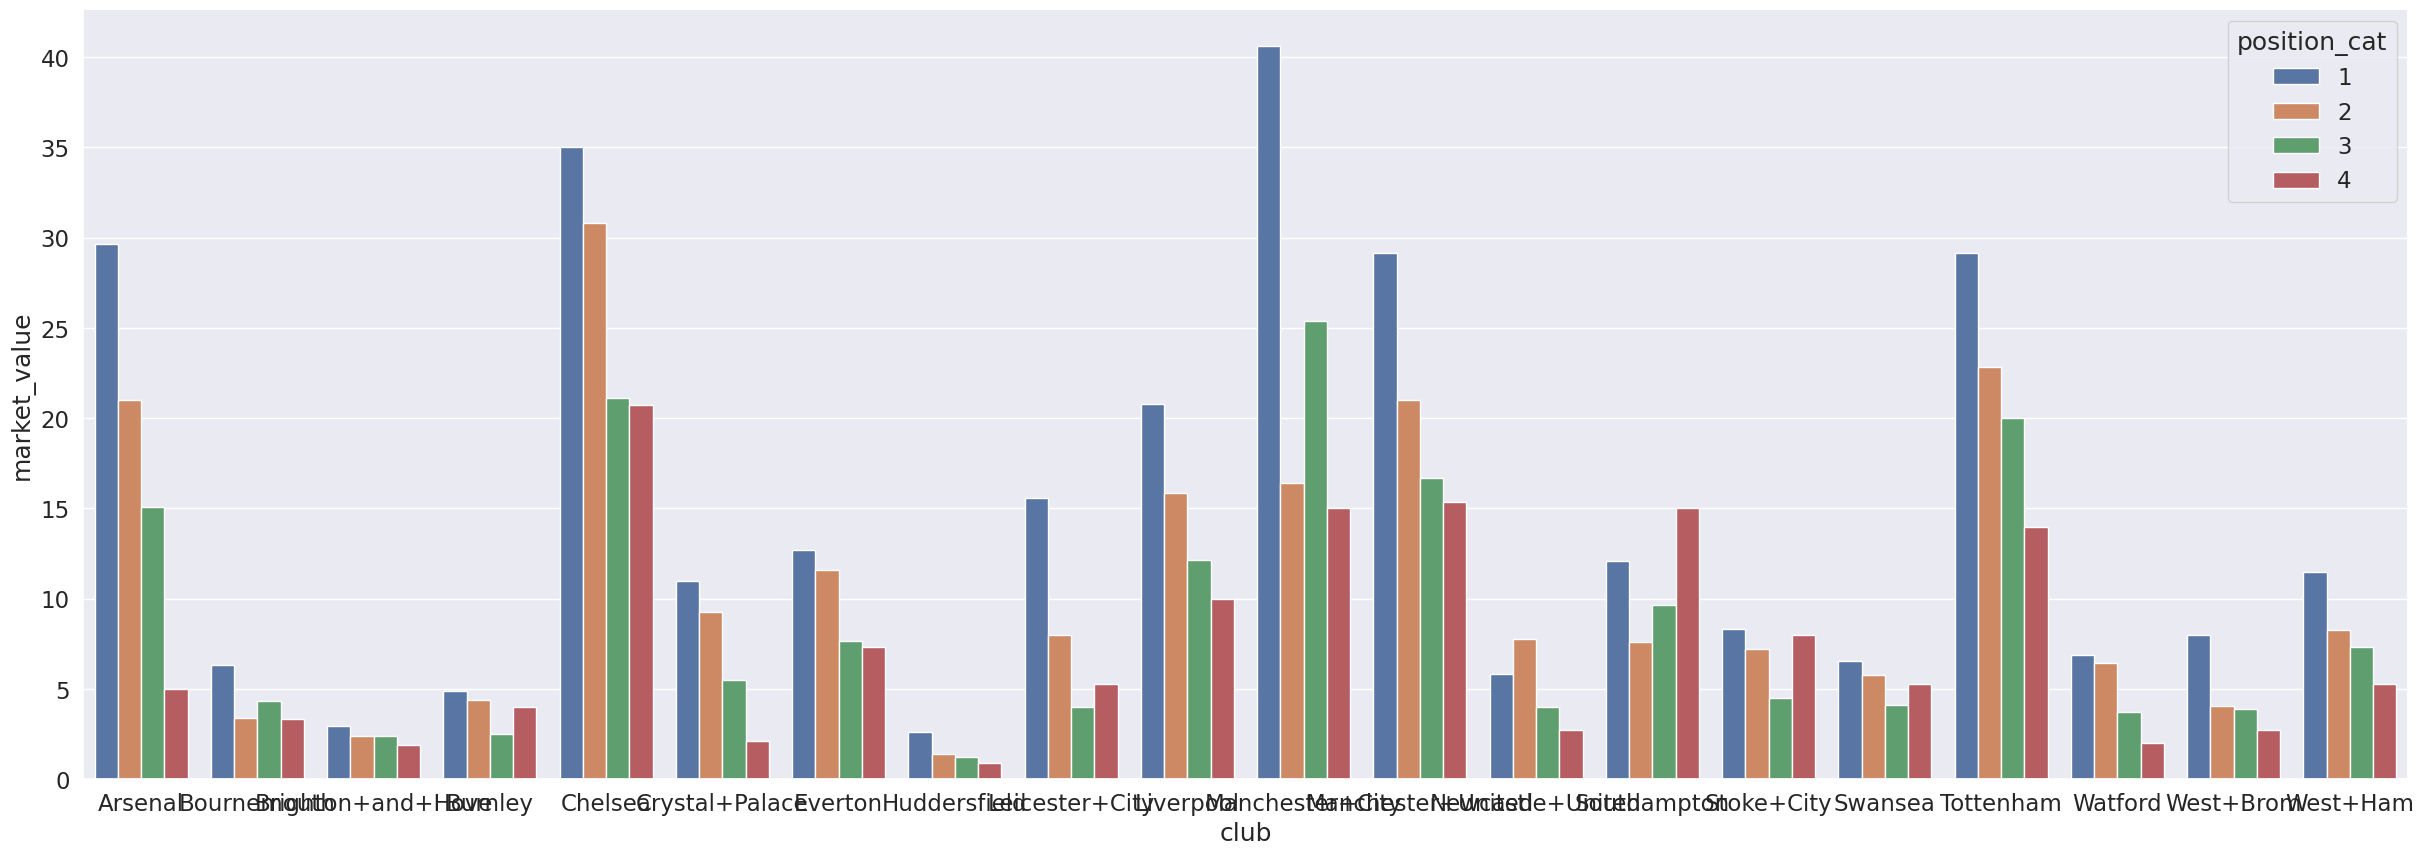

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
sns.set(font_scale=1.5)
sns.barplot(data=df2,x='club',y='market_value',hue='position_cat')   #position_cat/market_value/club


In [ ]:
df_task1=train.iloc[:,[1,6]]
df_task1

,club,page_views
0,Arsenal,4329
1,Arsenal,4395
2,Arsenal,1529
3,Arsenal,2393
4,Arsenal,912
...,...,...
456,West+Ham,288
457,West+Ham,199
458,West+Ham,198
459,West+Ham,412


In [ ]:

grouped_df=df_task1.groupby('club')
grouped_mean=grouped_df.mean()
grouped_mean=grouped_mean.reset_index()
grouped_mean

,club,page_views
0,Arsenal,1402.785714
1,Bournemouth,508.458333
2,Brighton+and+Hove,198.272727
3,Burnley,287.833333
4,Chelsea,1773.800000
5,Crystal+Palace,455.428571
6,Everton,908.785714
7,Huddersfield,139.785714
8,Leicester+City,712.750000
9,Liverpool,1195.296296


<Axes: xlabel='club', ylabel='page_views'>

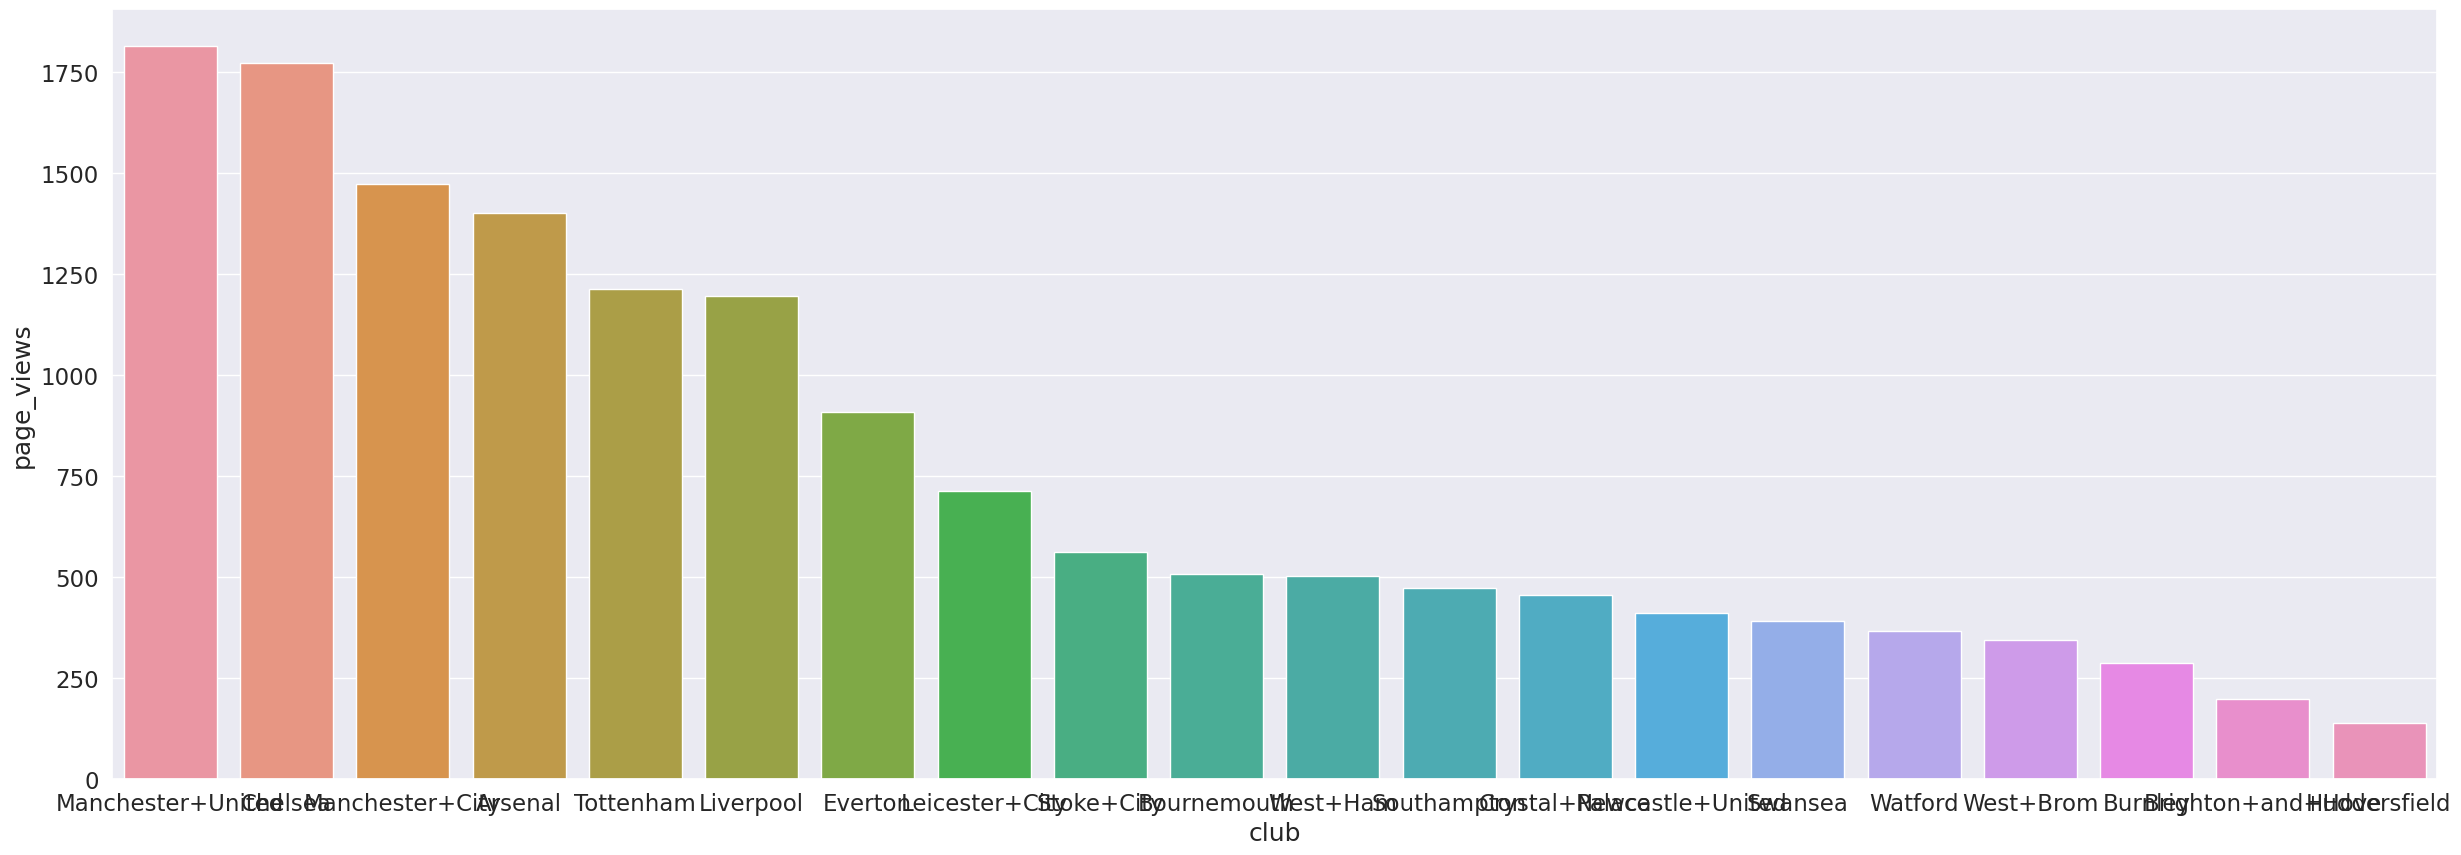

In [ ]:
grouped_mean.sort_values('page_views',axis=0,na_position='last',inplace=True,ascending=False)
sns.barplot(data=grouped_mean,x='club',y='page_views')


 **Nationality of maximum number of players**

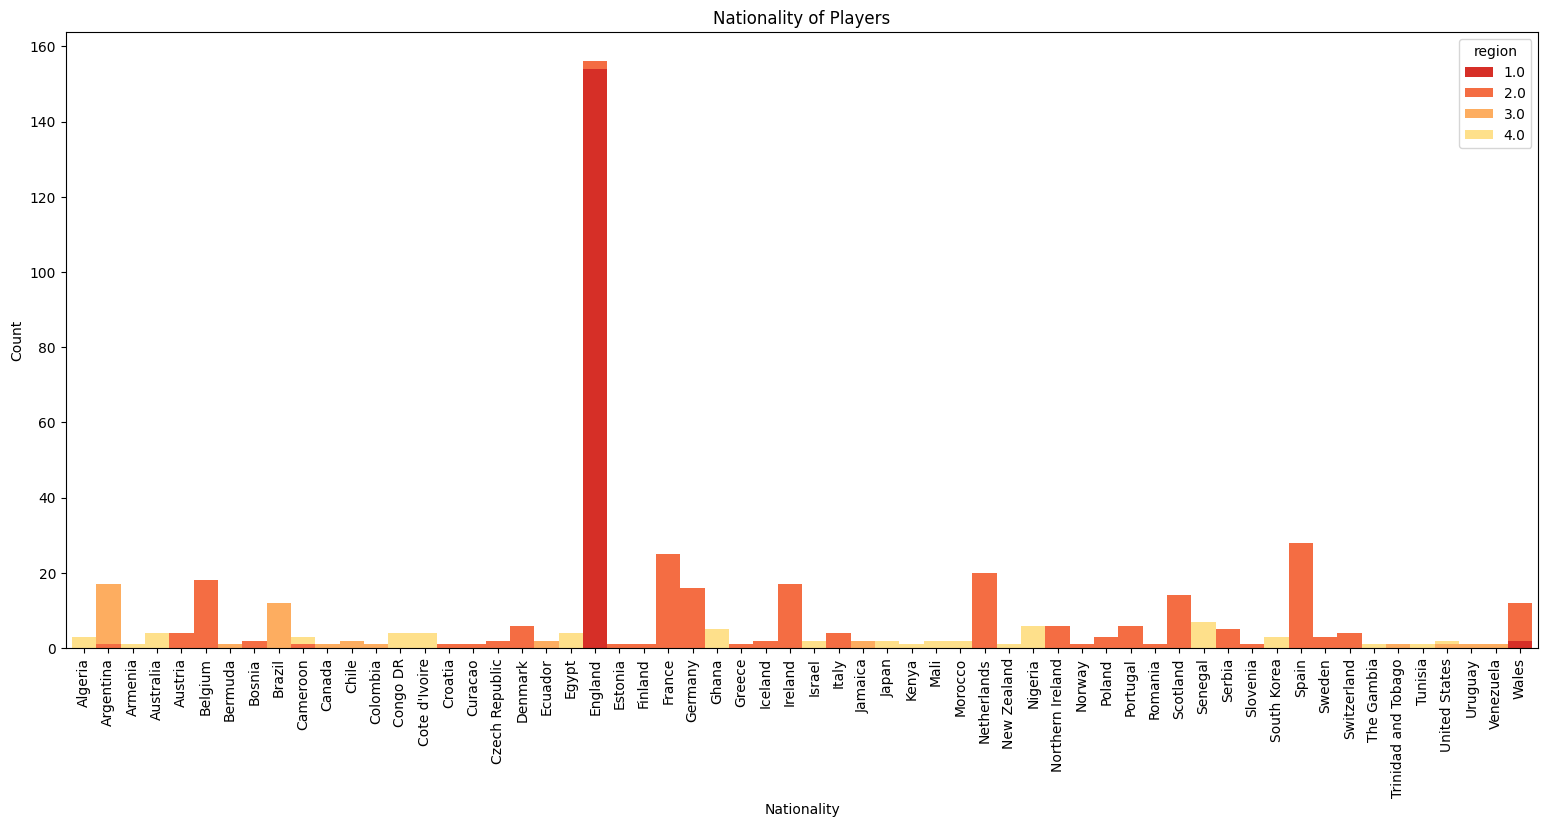

In [ ]:
pd.crosstab(train.nationality,train.region).plot.bar(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(19,8)
plt.title('Nationality of Players')
plt.xlabel('Nationality')
plt.ylabel('Count')
## how to add this one here -->>> ,x='Nationality',y='Count')
plt.show()

From the above graph, we canconclude that England has highest i.e. maximum number of players



In [ ]:
# Changing the fpl_sel column from string object to float values
lstdf1=[]
lst_df=list(train['fpl_sel'])
for val in lst_df:
    x=val.split('%')
    lstdf1.append(x)
lstdf1


[['17.10', ''],
 ['5.60', ''],
 ['5.90', ''],
 ['1.50', ''],
 ['0.70', ''],
 ['13.70', ''],
 ['2.50', ''],
 ['4.70', ''],
 ['4.00', ''],
 ['1.00', ''],
 ['2.00', ''],
 ['1.80', ''],
 ['0.00', ''],
 ['5.10', ''],
 ['1.70', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['0.10', ''],
 ['0.50', ''],
 ['1.70', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['4.20', ''],
 ['0.20', ''],
 ['0.40', ''],
 ['1.00', ''],
 ['6.90', ''],
 ['26.50', ''],
 ['10.40', ''],
 ['15.00', ''],
 ['19.80', ''],
 ['6.90', ''],
 ['2.00', ''],
 ['0.60', ''],
 ['0.90', ''],
 ['1.60', ''],
 ['4.00', ''],
 ['0.70', ''],
 ['0.90', ''],
 ['0.10', ''],
 ['0.20', ''],
 ['11.50', ''],
 ['0.10', ''],
 ['1.10', ''],
 ['0.40', ''],
 ['0.80', ''],
 ['0.10', ''],
 ['1.50', ''],
 ['0.10', ''],
 ['0.40', ''],
 ['3.30', ''],
 ['9.30', ''],
 ['2.10', ''],
 ['1.50', ''],
 ['4.10', ''],
 ['0.60', ''],
 ['8.00', ''],
 ['0.40', ''],
 ['0.20', ''],
 ['3.20', ''],
 ['0.80', ''],
 ['0.20', ''],
 ['4.80', ''],
 ['0.90', ''],
 ['0.30', ''],
 ['0.60', ''],
 ['

In [ ]:
lst_final=[]
for value in lstdf1:
    lst_final.append(float(value[0]))
lst_final


[17.1,
 5.6,
 5.9,
 1.5,
 0.7,
 13.7,
 2.5,
 4.7,
 4.0,
 1.0,
 2.0,
 1.8,
 0.0,
 5.1,
 1.7,
 0.1,
 0.5,
 0.1,
 0.5,
 1.7,
 0.8,
 0.1,
 4.2,
 0.2,
 0.4,
 1.0,
 6.9,
 26.5,
 10.4,
 15.0,
 19.8,
 6.9,
 2.0,
 0.6,
 0.9,
 1.6,
 4.0,
 0.7,
 0.9,
 0.1,
 0.2,
 11.5,
 0.1,
 1.1,
 0.4,
 0.8,
 0.1,
 1.5,
 0.1,
 0.4,
 3.3,
 9.3,
 2.1,
 1.5,
 4.1,
 0.6,
 8.0,
 0.4,
 0.2,
 3.2,
 0.8,
 0.2,
 4.8,
 0.9,
 0.3,
 0.6,
 0.2,
 0.1,
 0.2,
 0.1,
 0.3,
 1.3,
 0.4,
 0.2,
 13.5,
 2.9,
 1.7,
 13.7,
 2.5,
 1.2,
 1.2,
 0.2,
 0.1,
 0.2,
 0.0,
 0.5,
 0.1,
 0.4,
 0.1,
 0.1,
 1.7,
 0.4,
 2.3,
 3.0,
 12.0,
 12.4,
 12.3,
 7.8,
 18.5,
 20.3,
 7.5,
 9.0,
 0.2,
 5.0,
 13.8,
 0.2,
 1.6,
 0.8,
 0.1,
 0.1,
 6.4,
 1.6,
 20.9,
 10.5,
 2.7,
 4.2,
 10.9,
 2.1,
 1.2,
 1.4,
 0.6,
 2.0,
 1.1,
 0.6,
 0.3,
 0.3,
 0.2,
 0.1,
 0.0,
 0.1,
 0.0,
 16.4,
 2.0,
 0.7,
 10.0,
 0.4,
 4.7,
 3.2,
 13.1,
 6.3,
 14.6,
 0.4,
 1.3,
 20.9,
 0.1,
 0.3,
 1.7,
 1.0,
 2.9,
 0.2,
 0.9,
 0.4,
 0.1,
 0.2,
 0.3,
 0.3,
 1.7,
 0.2,
 0.2,
 3.6,
 2.1,
 2.4,
 0.5,

<ipython-input-24-37240473e41f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , xticklabels= train.corr().columns , yticklabels= train.corr().columns)


<Axes: >

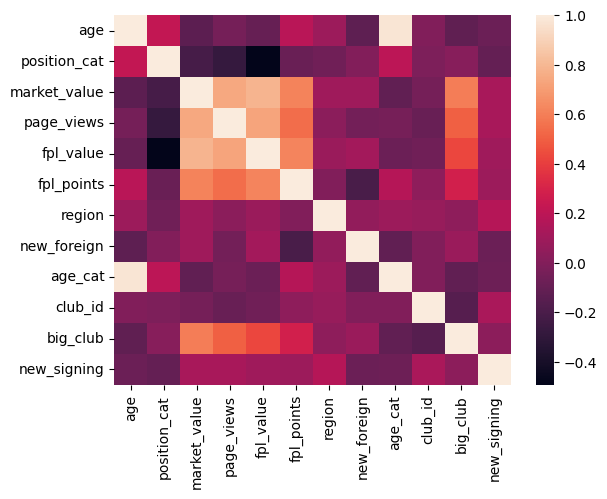

In [ ]:
sns.heatmap(train.corr() , xticklabels= train.corr().columns , yticklabels= train.corr().columns)

# **Task 2:Build models using all the algorithms above to predict market_value (15 marks)**


**Model Evaluations**
<p>There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).</p>
<p><i>RMSE</i>: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.</p>

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/football.csv')
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
train.drop(['name','club','position','nationality'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3.0,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2.0,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2.0,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1.0,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2.0,0,4,1,1,0


In [ ]:
train['FPL_SEL'] = pd.to_numeric(train['fpl_sel'].str[:-1])
train.drop(['fpl_sel'],axis=1,inplace=True)
X= train.drop('market_value',axis=1)
Y= train['market_value']
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3.0,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2.0,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2.0,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1.0,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2.0,0,4,1,1,0,0.7


In [ ]:
from sklearn.model_selection  import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(345, 12)
(116, 12)
(345,)
(116,)


In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(999, inplace=True)


In [ ]:
X= train.drop('market_value',axis=1)
Y= train['market_value']
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(345, 12)
(116, 12)
(345,)
(116,)


In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(999, inplace=True)




# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pred = regressor.predict(X_test)
print(pred)

[ 1.52703694 18.68945466 11.700636    9.31036483 14.05050535  2.24909208
  3.21912436  2.05218027  3.63725573  6.9791486  -1.10010911  9.895783
 18.04058171  3.29594986  0.85607011 23.50832413  4.37557339 31.8463499
 25.61758329  8.13932408 25.01413998 18.45301467  2.3197546   1.37167208
  2.84814392 15.65700157 37.30400338  0.43553028  5.48922326  0.34881889
  7.58209926 17.49450635 -2.15426587 42.67461782 -1.31463159  6.70440063
  5.87949504  6.67501001  7.72050123  7.35547639 13.58543796 20.14610738
  7.41155653  5.96847335  2.15747288  4.76250126 12.52591818 10.84056143
  4.14427672  5.85601848  8.72725738  5.33600594 23.08468837  6.13198216
 10.39572914  7.711698    6.87095011  1.58763598  5.69814623  8.69129791
 27.38388572  8.18545713 20.79242051  2.06964024 13.31403918  0.69072175
 50.82780096 59.72476446  2.91583012 13.05231907 16.3567369  -2.7652721
 18.9400656   6.71054651  1.03873243  4.24327257 18.85932057  9.23363636
  1.87623047  7.08939406 25.41630964 18.57236567  3.547

<ipython-input-76-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

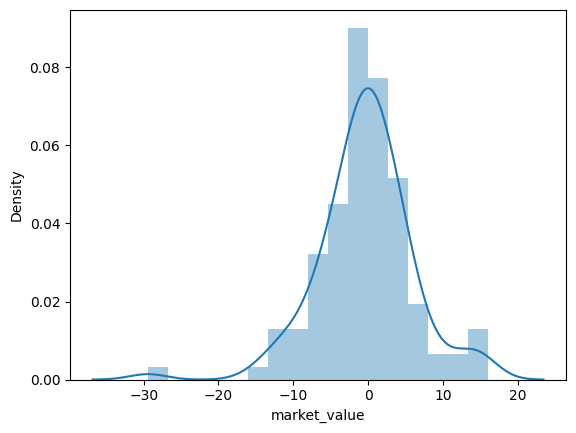

In [ ]:
sns.distplot(Y_test-pred)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

6.351259602564828


# **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1.0)
reg.fit(X_train, Y_train)

Lasso()

In [ ]:
pred = reg.predict(X_test)
print(pred)

[ 3.987613   22.2431101  12.71610886 13.15091674  9.84077983  3.97047052
  3.98182151  4.52661458  4.54596104  7.43389051  1.02979263  9.07721634
 17.32482442  4.43582856  0.70536185 17.44465137  7.94871567 29.29508414
 24.95570159 11.18021748 22.35625255 15.4523469   4.99178569  1.29957831
  4.54033657 11.05398496 36.1063065   3.08552867  6.58541047  3.26168357
  8.93271768 13.57052836 -0.8056411  39.24625463  0.35405601  9.62873471
  8.17104353  7.46120961  7.34195601  7.45768686 14.16743161 17.74225325
  2.21058074  8.15408714  4.25740053  6.54998532 12.76474562  6.49263923
  4.24100513  6.9429388   5.65648656  6.3474478  20.30249832  9.26084548
  7.97384341  2.53295063 10.10759286  2.91007864  6.35931384  9.90312459
 27.15092633  4.58847681 22.87767482  3.83249028 16.68353269  2.853837
 49.12556293 59.82587626  4.90689928 12.0825607  12.95005628  0.51559715
 14.08895537  2.07853368  3.6249219   5.74867942 14.07860064 10.99692476
  3.33943937  8.0074184  22.1556843  18.70360765  3.8

<ipython-input-176-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

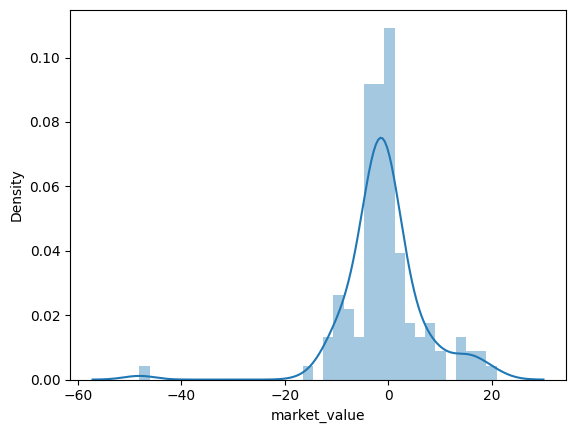

In [ ]:
sns.distplot(Y_test-pred)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

7.809369303099722


# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)

Ridge()

In [ ]:
pred= clf.predict(X_test)
print(pred)


[ 1.61069853 18.79951112 11.70966299  9.36091451 14.01002744  2.29310692
  3.2204008   2.09391892  3.64886261  7.02217979 -1.06999804  9.84629985
 17.98914948  3.35373169  0.9024802  23.48664054  4.36407647 31.81567987
 25.58588524  8.19447447 24.97972834 18.37579542  2.31932252  1.42058613
  2.86587821 15.65815507 37.21470474  0.50565935  5.47763344  0.41144085
  7.72424222 17.53628463 -2.12474464 42.6375564  -1.28605648  6.72574706
  5.89059929  6.72450917  7.69482226  7.35367447 13.52145458 20.06419138
  6.97109385  5.96337249  2.20892814  4.85811849 12.44349093 10.81233997
  4.12086031  5.87210173  8.70859601  5.346235   22.97623658  6.19417348
 10.35049802  7.2742895   6.88050656  1.6929729   5.78591091  8.66573058
 27.37755634  8.19781277 20.82564675  2.14918711 13.35817655  0.7743637
 50.93405182 59.93242663  3.01141735 12.98778083 16.3127041  -2.74032874
 18.87477895  6.23402675  1.05788502  4.2247595  18.82487298  9.23577731
  1.92251953  7.11893699 25.4285296  18.55563522  3.

<ipython-input-183-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

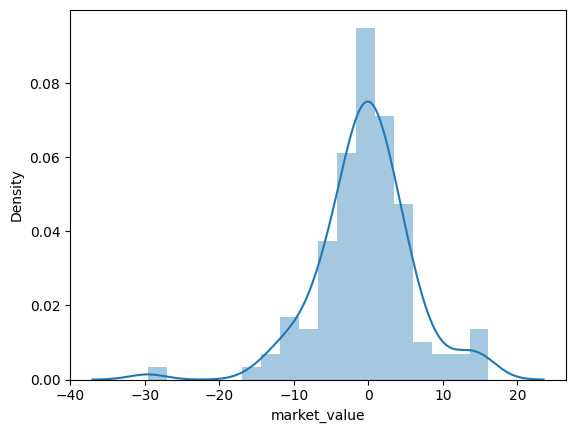

In [ ]:
sns.distplot(Y_test-pred)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

6.353988778873065


# **NEAREST NEIGHBOUR REGRESSOR**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
pred = neigh.predict(X_test)
print(pred)

[ 2.1  24.4  12.   13.3   5.5   4.85  3.9   2.5   3.    4.8   6.    5.6
 23.    4.9   1.45 23.    7.2  28.6  30.   10.7  20.2  22.    4.4   0.7
  3.4   6.3  26.    2.15  7.3   6.4   7.1   8.5   1.8  23.6   2.4  11.4
  7.6  10.    4.    6.1  14.4  23.    1.8   9.2   4.    5.7  22.4   8.7
  8.7   5.4   5.7   5.3  18.8   8.   18.2   0.7   8.6   1.45  5.1  14.
 23.    8.5  20.1   7.3  13.3   0.7  56.   47.6   5.62 17.2  20.2   5.7
 27.    1.75  2.25  4.5  12.    8.    5.2   5.5  20.2  11.6   4.8  22.
  1.1   2.35 23.6   9.3   8.5  11.8  20.1   3.3   1.65  6.2  22.2   7.5
  3.35  9.6   6.4   8.4  15.4  19.4   8.6  15.8   9.4   6.9   4.9   5.9
 24.2   3.35 57.    6.81  8.5  14.1  19.8   9.2 ]


<ipython-input-103-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

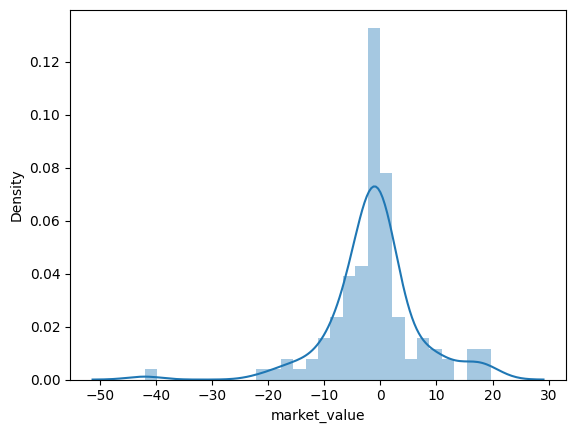

In [ ]:
sns.distplot(Y_test-pred)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

8.044732427345624


# **SUPPORT VECTOR REGRESSOR**

In [ ]:
from sklearn.svm import SVR
sregressor = SVR(kernel = 'rbf')
sregressor.fit(X_train, Y_train)

SVR()

In [ ]:
pred =sregressor.predict(X_test)
print(pred)

[ 2.91176496 21.55306939  7.52563121 19.48260953 10.01980385  3.51976702
  3.50610915  2.71691362  3.33157429  4.08176462  3.85586222  5.40686044
 21.73378955  3.41063269  2.48353734 17.48390053  6.53864091 21.61046245
 20.95719792  8.93783856 19.2734449  21.24312355  3.06905972  2.37593905
  3.47684469 10.10065841 19.69573126  2.57678507  4.32387154  3.83208948
  8.20047967  7.80576628  2.29039434 19.94565855  2.94518868 11.02515148
  6.51338985  5.69639586  3.24211169  4.97111021 10.93318403 21.26149818
  2.3158072   6.84201557  3.25163955  3.49176924 21.70979611  4.76977225
  4.70179047  4.87547773  8.12724963  4.18438297 21.82920475 11.81093281
 14.48181226  2.3641546  10.29620467  2.10699919  3.60067704  8.75755091
 20.66942306  5.07006642 20.60024109  4.85113654 19.86724079  2.36971553
 22.9769862  21.79861036  5.67105568 18.53268862 13.73287415  3.43912851
 16.74395993  2.55055982  3.08243614  3.43515626  8.01827504  7.24140588
  3.96721903  6.39051866 16.13654224 11.21322638  3

<ipython-input-100-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

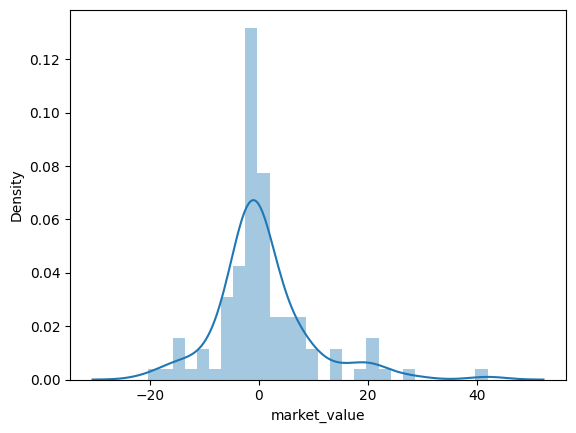

In [ ]:
sns.distplot(Y_test-pred)

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)


8.84968815755112


# **TREE REGRESSOR**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tregressor = DecisionTreeRegressor(random_state=0)
tregressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

[ 0.25 15.    5.   15.   12.    0.75  2.5   0.5   5.5   5.    4.   12.
 12.    2.    0.5  20.   15.   20.   25.    5.   24.   12.    3.    5.
  3.   15.   28.    2.5   4.    6.   18.   15.    0.5  40.    1.   14.
  9.    6.    2.5  11.    7.    4.    5.    9.    5.5   0.75  1.5   6.
  5.    8.    5.   15.   35.    8.    4.    6.   10.    0.75  6.   15.
 28.    5.   18.    6.   12.    0.5  65.   65.    5.    1.5  17.    1.
 20.    3.5   2.5   1.5   9.   15.    2.    5.   30.   11.    2.5   8.
  0.25  5.   30.   20.    7.   15.   10.    1.    0.75  9.   16.    7.
  1.5  20.   15.    8.    7.    4.    5.   22.    5.    2.   10.    5.
 16.    6.   12.    1.5   3.5  15.   12.   22.  ]


<ipython-input-192-4e6e8e11d344>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

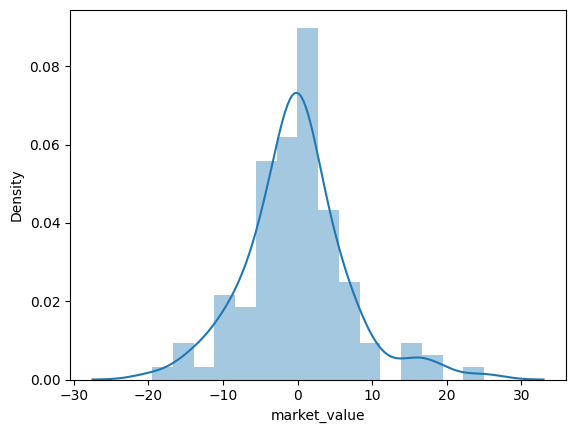

In [ ]:
pred= tregressor.predict(X_test)
print(pred)
sns.distplot(Y_test-pred)



In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)


6.840075871730845


# **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rregressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
pred= rregressor.predict(X_test)
print(pred)


[ 1.374  17.445   6.091  12.82    8.86    1.995   3.825   1.635   4.36
  6.855   3.298   8.49   17.21    5.125   2.0125 16.32    6.62   24.84
 21.555   8.675  30.17   18.95    3.565   1.83    4.3325 10.97   29.8
  2.6365  4.503   5.0255 10.975  17.8     0.71   34.85    1.488  10.695
  6.905   9.115   5.5615  8.465  11.13   16.1     2.835   5.8105  3.993
  4.8675  7.015   5.697   5.716   7.065   6.99    5.73   29.25    9.295
  9.755   3.3955 10.57    0.756   6.735   8.145  25.53    5.6885 17.195
  6.37   15.15    1.321  50.47   53.33    6.031   8.47   20.735   2.839
 21.59    3.2025  3.085   3.03   15.62    7.711   3.0615  7.99   29.11
 14.975   3.75   17.11    1.315   2.89   27.19   11.345   5.527  13.64
 20.34    2.9075  2.753   6.56   17.06   10.505   3.0225 14.095   6.2175
 10.48   13.45   10.2     4.935  13.115   9.56    5.1835  3.855   6.45
 15.475   3.5815 35.125   2.647   4.62   12.145  15.72   10.73  ]


<ipython-input-110-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

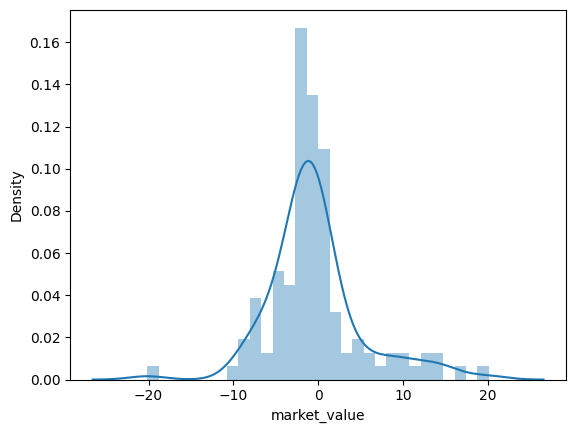

In [ ]:
sns.distplot(Y_test-pred)


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

5.558266868926581


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
REGGB = GradientBoostingRegressor(random_state=0)
REGGB.fit(X_train, Y_train)


GradientBoostingRegressor(random_state=0)

In [ ]:
pred= REGGB.predict(X_test)
print(pred)


[ 0.90602794 17.36769438  3.67429342 12.3262993   5.53109106  1.3413235
  3.27744022  0.79605546  3.72802815  8.12268384  1.51902835  8.2818338
 12.81526617  5.52612824  0.52602921 15.1372918   4.52105033 26.30567518
 22.74718303  7.11233871 34.19974225 21.34991767  2.09862128  1.40852057
  6.70277386 11.95428973 34.04133058  2.45857871  5.52886373  2.96008766
 11.84579843 22.6858592  -0.87868668 37.42019142 -0.69540258 10.4433931
  7.16794027  9.03649679  6.85871098  9.67772158 12.39373294 12.32570417
  2.65693934  0.66630728  4.53757393  4.29127193  6.75686804  2.57897826
  3.92414275  6.90057126  8.49939722  5.10781931 25.57408887  8.4838468
  9.64916812  3.64031799 11.07844146 -0.68871505  6.47479041  4.42310306
 22.23017467  7.2822515  16.06212956  4.96028098 11.16066525 -0.73163042
 46.8426356  55.2116949   6.73168121  3.66694871 19.93182568 -0.28366495
 21.39886321  3.70040191  3.09788967  2.55350379 18.9940213   3.82845814
  3.71617582  5.47702094 37.86869863 16.21194307  4.144

<ipython-input-114-abffcb5e0484>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-pred)


<Axes: xlabel='market_value', ylabel='Density'>

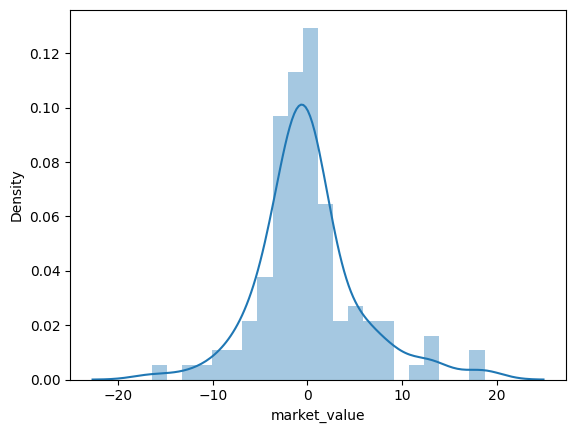

In [ ]:
sns.distplot(Y_test-pred)


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

5.345505708729987


# **Task 3: Use model selection approaches discussed in class to choose the best model (10 marks)**

Now, to train a model we need to split the dataset into training and testing values.

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/football.csv')
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
train.drop(['name','club','position','nationality'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,28,1,65.0,4329,12.0,17.10%,264,3.0,0,4,1,1,0
1,28,1,50.0,4395,9.5,5.60%,167,2.0,0,4,1,1,0
2,35,4,7.0,1529,5.5,5.90%,134,2.0,0,6,1,1,0
3,28,1,20.0,2393,7.5,1.50%,122,1.0,0,4,1,1,0
4,31,3,22.0,912,6.0,0.70%,121,2.0,0,4,1,1,0


In [ ]:
train['FPL_SEL'] = pd.to_numeric(train['fpl_sel'].str[:-1])
train.drop(['fpl_sel'],axis=1,inplace=True)
X= train.drop('market_value',axis=1)
Y= train['market_value']
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3.0,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2.0,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2.0,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1.0,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2.0,0,4,1,1,0,0.7


In [ ]:
from sklearn.model_selection  import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(345, 12)
(116, 12)
(345,)
(116,)


In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(999, inplace=True)


In [ ]:
X= train.drop('market_value',axis=1)
Y= train['market_value']




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
REGGB = GradientBoostingRegressor(alpha=0.99, learning_rate=0.1,  max_depth=6, max_features=1.0, min_samples_leaf=2, min_samples_split=19, n_estimators=100, subsample=0.8)
REGGB.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.99, max_depth=6, max_features=1.0,
                          min_samples_leaf=2, min_samples_split=19,
                          subsample=0.8)

In [ ]:
from sklearn import metrics
pred_GB= REGGB.predict(X_test)
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred_GB))
print(RMSE)

5.924414067017158


In [ ]:
print ('Regression: R^2 score on training set', REGGB.score(X_train,Y_train))
print ('Regression: R^2 score on test set', REGGB.score(X_test,Y_test))

Regression: R^2 score on training set 0.9891411940085881
Regression: R^2 score on test set 0.7508318617916421


In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_test, pred))
print(RMSE)

5.345505708729987


# **Task 4: Tune the hyperparameters and build the most accurate model (20 marks)**

**Hyperparameter Tuning**
<ol><li>Choose following method for hyperparameter tuning</li>
    a. RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model

<li>Assign hyperparameters in form of dictionary
<li>Fit the model
<li>Check best paramters and best score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
# Number of features to consider at every split
max_features=['auto','sqrt']
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]
# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [ ]:
# Create the random grid
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [ ]:
reg_rf=RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [ ]:
rf_random.fit(X_train,Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 13}

<ipython-input-207-2e4f18dd6eac>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_test-prediction)


<Axes: xlabel='market_value', ylabel='Density'>

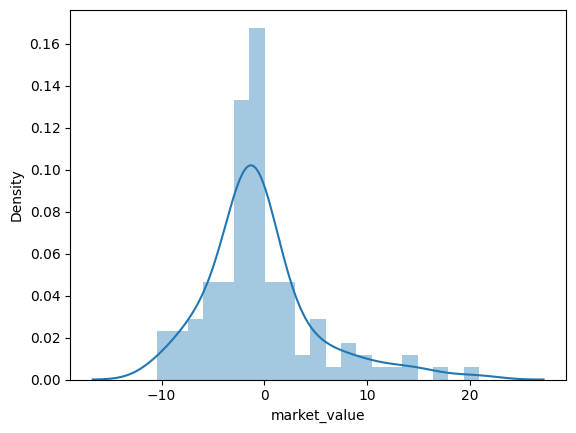

In [ ]:
prediction=rf_random.predict(X_test)
sns.distplot(Y_test-prediction)

In [ ]:
metrics.r2_score(Y_test,prediction)

0.7918282035486359

In [ ]:
print('MAE',metrics.mean_absolute_error(Y_test,prediction))
print('MSE',metrics.mean_squared_error(Y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,prediction)))

MAE 3.793650010513818
MSE 29.32379615368666
RMSE 5.415145072265992


In [ ]:
from sklearn import metrics
from sklearn import linear_model
def score_predict(ml_model):
    model=ml_model.fit(X_train,Y_train)
    y_prediction=model.predict(X_test)
    r2_score=metrics.r2_score(Y_test,y_prediction)
    print('r2 score: {:.0%}'.format(r2_score))

In [ ]:
print("LINEAR REGRESSION : ")
score_predict(LinearRegression())
print()
print("LASSO REGRESSION : ")
score_predict(linear_model.Lasso(alpha=0.2))
print()
print("RIDGE REGRESSION : ")
score_predict(linear_model.Ridge(alpha=.5))
print()
print("NEAREST NEIGHBOUR REGRESSION : ")
score_predict(KNeighborsRegressor(n_neighbors=2))
print()
print("TREE REGRESSION : ")
score_predict(DecisionTreeRegressor())
print()
print("RANDOM FOREST REGRESSION : ")
score_predict(RandomForestRegressor())
print()
print("GRADIENT BOOSTED REFGRESSION : ")
score_predict(GradientBoostingRegressor(random_state=0))
print()

LINEAR REGRESSION : 
r2 score: 71%

LASSO REGRESSION : 
r2 score: 69%

RIDGE REGRESSION : 
r2 score: 71%

NEAREST NEIGHBOUR REGRESSION : 
r2 score: 52%

TREE REGRESSION : 
r2 score: 67%

RANDOM FOREST REGRESSION : 
r2 score: 79%

GRADIENT BOOSTED REFGRESSION : 
r2 score: 80%



from the above we conclude that gradient boosted has higher r2 score followed by random forest and Linear regression so gradient boosted is the best model

# **Task 5: Implement a Genetic Algorithm for learning attribute weights for the Nearest Neighbour Algorithm. Implement at least one mechanism for maintaining Diversity within the Population (25 marks)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/football.csv')
df.head()


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
df.drop(['name','club','position','nationality'],axis=1,inplace=True)
df['FPL_SEL'] = pd.to_numeric(df['fpl_sel'].str[:-1])
df.drop(['fpl_sel'],axis=1,inplace=True)
X= df.drop('market_value',axis=1)
Y= df['market_value']



In [ ]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=101)
import random
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.34*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):

    scores = []
    from sklearn import neighbors
    from math import sqrt
    from sklearn.metrics import r2_score
    for chromosome in population:

      for i in range(10):
        i=i+1

        neigh_reg =neighbors.KNeighborsRegressor(n_neighbors = i)

        neigh_reg.fit(x_train.iloc[:,chromosome],y_train)

        predictions = neigh_reg.predict(x_test.iloc[:,chromosome])

        scores.append(r2_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    inds=[x for x in inds if x<460]
    inds=inds[::-1]
    inds=inds[: 460]
    print("##",len(scores))
    print("#@@#",len(inds))
    print("@@",len(population))
    return list(scores[inds]), list(population[inds,:])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
        # print(population_nextgen)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    # print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,x_train,x_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):

        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        # print(best_chromo)
    return best_chromo,best_score



In [ ]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train.fillna(999, inplace=True)
x_test.replace([np.inf, -np.inf], np.nan, inplace=True)
x_test.fillna(999, inplace=True)

In [ ]:

x_test.shape

(116, 12)

In [ ]:
chromo,score=generations(size=460,n_feat=12,n_parents=100,mutation_rate=0.10,n_gen=38,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)


<ipython-input-5-848e1fba91d1>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  chromosome = np.ones(n_feat,dtype=np.bool)


## 4600
#@@# 460
@@ 460
[0.759822289618548, 0.7572200783551255]
## 2000
#@@# 460
@@ 200


IndexError: ignored

In [ ]:
len(score)


NameError: ignored

In [ ]:
meansqureerror = mean_squared_error(y_test, y_pred63)
meansqureerror

NameError: ignored

In [ ]:
r2 = r2_score(y_test, y_pred63)
r2

NameError: ignored

In [ ]:
!pip install flask_ngrok
import pandas as pd
from sklearn.model_selection  import train_test_split

from flask_ngrok import run_with_ngrok
from flask import Flask


from flask import Flask, render_template, request, Response
app =Flask(__name__)

df = pd.read_csv('/content/drive/MyDrive/football.csv')

df1=df
df1.drop(["name","club","position","nationality","fpl_sel"],axis='columns',inplace=True)

x=df1[df1.columns[~df1.columns.isin(["market_value"])]].to_numpy()
y=df1.market_value.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

run_with_ngrok(app)

@app.route("/" , methods=['GET','POST'])
def index():
    return render_template("/content/drive/MyDrive/ml_assignment.html")
@app.route("/data", methods=['GET','POST'])
def data():
    if request.method == "POST":
         opt= request.form['excellent']
         m = int(opt)*1
         a= request.form['age']
         b= request.form['position_cat']
         c= request.form['page_views']
         d= request.form['fpl_value']
         e= request.form['fpl_points']
         f= request.form['region']
         g= request.form['new_foreign']
         h= request.form['age_cat']
         i= request.form['club_id']
         j= request.form['big_club']
         k= request.form['new_signing']
         li=[a,b,c,d,e,f,g,h,i,j,k]
         model=GradientBoostingRegressor()
         model.fit(x_train,y_train)
         y_pred=model.predict(x_test)
         market_value=model.predict([li])
    return render_template("/content/drive/MyDrive/ml_data.html",market_value=market_value )

app.run()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://be6e-104-199-151-121.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/flask/app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.9/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.9/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.9/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-1-d6f1696502cc>", line 25, in index
    return render_template("/content/drive/MyDrive/ml_assignment.html")
  File "/usr/local/lib/python3.9/dist-packages/flask/templating.py", line 146, in render_template
    template = app.jinja_env.get_or_select_template(template_name_or_list)
  File "/usr/local/lib/python3.9/dist-packages/jinja2/envi

In [ ]:
!ngrok config add-authtoken 2OXan8D9YuiIUfmR6zOt3mCz9Jo_4sAvP2UFtHbf5FmBkVuPV

/bin/bash: ngrok: command not found


# ***Report***

**<h1>Football Player Market Value Prediction**</h2>
**Problem Statement**
<p>In the English Premier League, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. You must have seen "Moneyball", where Peter Brand explains Billy Beane that "Its about getting things down to one number using stats the way we read them (players), we find value in player nobody else can see." Therefore, an important part of negotiations is predicting the fair market price for a player and perhaps perform EDA for this.</p>

<h3><b>EDA</b></h3>
<ol type="1"><h3>1. Players in every club and position</h3></ol>

<p>The bar graph above shows how many players are there in every club and the variation of player's positions.</p>
<li>x axis --> club names</li>
<li>y-axis --> total number of players.</li>
<p>The variation of player position are distinguish by different color in each bars. The colors code for players position is explained on the righ side of the chart. Arsenal , Everton , and Huddersfield have the biggest number of players with 28 players . Burnley has the lowest number of players with 18 players.</p>



<ol><h3>2.Distribution of Player's Ages</h3></ol>


<p>A typical histogram of players age can be called "Edge Peak Histogram".</p>

<li>The edge peak distribution looks like the normal distribution except that it has a large peak at one tail.</li>
<li>As it is shown in the histogram, the distribution of age is increased untill it meet the peak point at the age between 25-30.</li>
<li>There is one bar that significanly higher than the others, that is why the histogram above can be calles Edge peak histogram.</li>

<ol><h3>3.Top 10 Player Market Values (2017-2018)</h3></ol>

<p>The bar chart above shows the top 10 market value for each player.</p>
<li>x-axis --> players name</li>
<li>y-axis --> market value</li>
<p>It appears that Eden Hazard and Paul Pogba have the biggest market value, which is 75. They are followed by Alexis Sanchez on the 3rd position.</p>

<ol><h3>4.Average Market Value of every club</h3></ol>


<p>The bar chart above shows sorted average of market value for each club.</p>
<li>x-axis --> club names</li>
<li>y-axis --> average market value</li>
<p>It appears that ManCity and Chelsea, which are famous for spending money for a star player have the biggest average market value. They are followed by Totenham on the 3rd position. Burnley, Brighton, and Huddersfield are sitting in the lowest 3.</p>

<ol><h3>5.Most Viewed Players</h3></ol>


<p>The bar chart above shows the top 10 most view players.</p>
<li>x-axis --> Player names</li>
<li>y-axis --> Market value</li>
<p>It appears that Wayne Rooney has the biggest market value, followed by Paul Pogba and Dele Alli on 2nd and 3rd position.</p>



<ol><h3>6. FPL 10 most valuable players</h3></ol>
]

<p>The bar chart above shows the top 10 highest FPL value for each player. </p>T
<li>x-axis --> players name</li>
<li>y-axis --> FPL value</li>
<p>It appears that Harry Kane has the biggest FPL value, followed by Alexis Sanchez on the 2nd position. As it is shown in the graph above, there are 3 Belgium players that sit in this position, who are Eden Hazard, Kevin de Bruyne, and Romeru Lukaku while the FPL value top 10 position is dominated by foreign players. The only local player who is in this position is only Hary Kane.</p>

<ol><h3>7. Average of FPL value for every club<h3></ol>


<p>The bar chart above shows sorted average of FPL value for each
club.</p>
<li>x-axis --> club names</li>
<li>y-axis --> average FPL value</li>
<p>It appears that ManCity and Chelsea have the biggest average market value. They are followed by Totenham on the 3rd position and the 3 promoted clubs are sitting in the lowest 3.</p>

<ol><h3>Correlation Matrix</h3></ol>


<li>Each square shows the correlation between the variables the variables on each axis.</li>

<li>Values closer to zero means there is no linear trend between the two variables.</li>

<li>The close to 1 the correlation is the more positively correlated they are the closer to 1 the stronger the relationship is larger the number and darker the color the higher the correlation between the two variables.</li>

<ol><h3>9.Nationality of Players</h3></ol>


<p>The bar chart above shows the count of players w.r.t their nationality in the FPL.</p>
<li>x-axis --> countries</li>
<li>y-axis --> count for players</li>
<p>We can conclude that England has highest i.e. maximum number of players.</p>

# **2.	Comparison of Different Regression Models:**
<b>Linear Regression:</b><br>
RMSE score:  6.351259602564828<br>


<b>Lasso Regression:</b><br>
RMSE score: 7.809369303099722 <br>


<b>Ridge Regression:</b><br>
RMSE score: 6.353988778873065 <br>


<b>Nearest Neighbour Regression:</b><br>
RMSE score: 8.044732427345624 <br>

<b>SVR Regression:</b><br>
RMSE score: 8.84968815755112<br>

<b>Tree Regression::</b><br>
RMSE score: 6.840075871730845 <br>

<b>Random Forest:</b><br>  
RMSE score: 5.558266868926581 <br>

<b>Gradient Boost Regression:</b><br>  
RMSE score: 5.345505708729987 <br>

